In [ ]:
import tensorflow as tf
import numpy as np

class RBM(object):
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.W = tf.Variable(tf.random.normal([input_size, output_size], stddev=0.1))
        self.hb = tf.Variable(tf.zeros([output_size]))
        self.vb = tf.Variable(tf.zeros([input_size]))
        
    def sample_h_given_v(self, v):
        p_h_given_v = tf.nn.sigmoid(tf.matmul(tf.cast(v, tf.float32), self.W) + self.hb)
        h = tf.nn.relu(tf.sign(p_h_given_v - tf.random.uniform(tf.shape(p_h_given_v))))
        return h, p_h_given_v
    
    def sample_v_given_h(self, h):
        p_v_given_h = tf.nn.sigmoid(tf.matmul(tf.cast(h, tf.float32), tf.transpose(self.W)) + self.vb)
        v = tf.nn.relu(tf.sign(p_v_given_h - tf.random.uniform(tf.shape(p_v_given_h))))
        return v, p_v_given_h
    
    def gibbs_hvh(self, h):
        v, _ = self.sample_v_given_h(h)
        h, _ = self.sample_h_given_v(v)
        return v, h
    
    def gibbs_vhv(self, v):
        h, _ = self.sample_h_given_v(v)
        v, _ = self.sample_v_given_h(h)
        return h, v
        
def train_rbm(rbm, dataset, learning_rate=0.1, epochs=50, batch_size=100):
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    for epoch in range(epochs):
        for i in range(0, len(dataset), batch_size):
            batch = dataset[i:i+batch_size]
            train_step(rbm, optimizer, batch)
        print("Epoch:", epoch+1)
        
def train_step(rbm, optimizer, v):
    with tf.GradientTape() as tape:
        h0, _ = rbm.sample_h_given_v(v)
        vk, hk = rbm.gibbs_hvh(h0)
        loss = tf.reduce_mean(tf.cast(tf.square(v - vk), tf.float32))
    gradients = tape.gradient(loss, [rbm.W, rbm.hb, rbm.vb])
    optimizer.apply_gradients(zip(gradients, [rbm.W, rbm.hb, rbm.vb]))
    
def binarize(x):
    return np.where(x > 0, 1, 0)

# Load dataset
(X_train, _), _ = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = binarize(X_train)

# Preprocess dataset
X_train = X_train.astype('float32')
X_train /= 255.

# Train RBM
rbm = RBM(784, 128)



In [ ]:
train_rbm(rbm, X_train)


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50


Epoch: 1 Loss: 0.5022236
Epoch: 2 Loss: 0.50218344
Epoch: 3 Loss: 0.50214005
Epoch: 4 Loss: 0.5022646
Epoch: 5 Loss: 0.50224566
Epoch: 6 Loss: 0.5021809
Epoch: 7 Loss: 0.50211585
Epoch: 8 Loss: 0.50220835
Epoch: 9 Loss: 0.50217515
Epoch: 10 Loss: 0.50215274
Epoch: 11 Loss: 0.50219584
Epoch: 12 Loss: 0.5021304
Epoch: 13 Loss: 0.5022296
Epoch: 14 Loss: 0.5021965
Epoch: 15 Loss: 0.50225526
Epoch: 16 Loss: 0.5022711
Epoch: 17 Loss: 0.50205904
Epoch: 18 Loss: 0.50231624
Epoch: 19 Loss: 0.5022481
Epoch: 20 Loss: 0.5021077


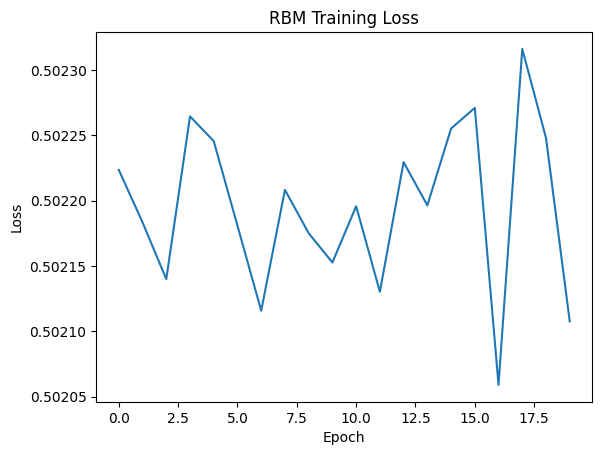

In [ ]:
import matplotlib.pyplot as plt

losses = []

def train_rbm(rbm, dataset, learning_rate=0.1, epochs=20, batch_size=100):
    optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    for epoch in range(epochs):
        for i in range(0, len(dataset), batch_size):
            batch = dataset[i:i+batch_size]
            train_step(rbm, optimizer, batch)
        loss = compute_loss(rbm, dataset)
        losses.append(loss)
        print("Epoch:", epoch+1, "Loss:", loss)
        
def compute_loss(rbm, dataset):
    h, _ = rbm.sample_h_given_v(dataset)
    vk, _ = rbm.gibbs_hvh(h)
    loss = tf.reduce_mean(tf.square(dataset - vk))
    return loss.numpy()

# Train RBM and collect losses
rbm = RBM(784, 128)
train_rbm(rbm, X_train)

# Plot losses
plt.plot(losses)
plt.title('RBM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
